In [1]:
from __future__ import print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

# to not display the warnings of tensorflow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

c:\users\costi\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
c:\users\costi\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# parameters to be set ("optimum" hyperparameters obtained from grid search):
look_back = 7
epochs = 1000
batch_size = 32

In [3]:
# fix random seed for reproducibility
np.random.seed(7)

In [5]:
# read all prices using panda
prices_dataset =  pd.read_csv('prices-split-adjusted.csv', header=0)

In [6]:
# filter out only data of Apple
apple = prices_dataset[prices_dataset['symbol']=='AAPL']

In [7]:
# save Apple's stock values as type of floating point number
apple_stock_prices = apple.close.values.astype('float32')

In [8]:
# reshape to column vector
apple_stock_prices = apple_stock_prices.reshape(len(apple_stock_prices), 1)

In [9]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
apple_stock_prices = scaler.fit_transform(apple_stock_prices)

In [10]:
# split data into training set and test set
train_size = int(len(apple_stock_prices) * 0.67)
test_size = len(apple_stock_prices) - train_size
train, test = apple_stock_prices[0:train_size,:], apple_stock_prices[train_size:len(apple_stock_prices),:]

print('Split data into training set and test set... Number of training samples/ test samples:', len(train), len(test))

Split data into training set and test set... Number of training samples/ test samples: 1180 582


In [24]:
train

array([[0.02971783],
       [0.03021854],
       [0.02560389],
       ...,
       [0.6718587 ],
       [0.66835374],
       [0.6968672 ]], dtype=float32)

In [22]:
# convert an array of values into a time series dataset 
# in form 
#                     X                     Y
# t-look_back+1, t-look_back+2, ..., t     t+1

def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# convert Apple's stock price data into time series dataset
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [25]:
trainY

array([0.02517086, 0.02351987, 0.01878342, ..., 0.6776372 , 0.6718587 ,
       0.66835374], dtype=float32)

In [12]:
# reshape input of the LSTM to be format [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [21]:
trainX

array([[[0.02971783],
        [0.03021854],
        [0.02560389],
        ...,
        [0.02697071],
        [0.02444008],
        [0.02120578]],

       [[0.03021854],
        [0.02560389],
        [0.02507612],
        ...,
        [0.02444008],
        [0.02120578],
        [0.02517086]],

       [[0.02560389],
        [0.02507612],
        [0.02697071],
        ...,
        [0.02120578],
        [0.02517086],
        [0.02351987]],

       ...,

       [[0.69582516],
        [0.70757157],
        [0.70870835],
        ...,
        [0.71865493],
        [0.677353  ],
        [0.6695853 ]],

       [[0.70757157],
        [0.70870835],
        [0.71107656],
        ...,
        [0.677353  ],
        [0.6695853 ],
        [0.6776372 ]],

       [[0.70870835],
        [0.71107656],
        [0.71865493],
        ...,
        [0.6695853 ],
        [0.6776372 ],
        [0.6718587 ]]], dtype=float32)

In [14]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=batch_size)

c:\users\costi\appdata\local\programs\python\python35\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/200
1172/1172 [==============================] - 1s 1ms/step - loss: 0.2066
Epoch 2/200
1172/1172 [==============================] - 0s 156us/step - loss: 0.0867
Epoch 3/200
1172/1172 [==============================] - 0s 156us/step - loss: 0.0343
Epoch 4/200
1172/1172 [==============================] - 0s 162us/step - loss: 0.0211
Epoch 5/200
1172/1172 [==============================] - 0s 159us/step - loss: 0.0173
Epoch 6/200
1172/1172 [==============================] - 0s 157us/step - loss: 0.0138
Epoch 7/200
1172/1172 [==============================] - 0s 177us/step - loss: 0.0105
Epoch 8/200
1172/1172 [==============================] - 0s 169us/step - loss: 0.0076
Epoch 9/200
1172/1172 [==============================] - 0s 178us/step - loss: 0.0052
Epoch 10/200
1172/1172 [==============================] - 0s 181us/step - loss: 0.0033
Epoch 11/200
1172/1172 [==============================] - 0s 167us/step - loss: 0.0020
Epoch 12/200
1172/1172 [==============================

1172/1172 [==============================] - 0s 180us/step - loss: 3.7205e-04
Epoch 92/200
1172/1172 [==============================] - 0s 175us/step - loss: 3.6892e-04
Epoch 93/200
1172/1172 [==============================] - 0s 166us/step - loss: 3.7225e-04
Epoch 94/200
1172/1172 [==============================] - 0s 171us/step - loss: 3.6798e-04
Epoch 95/200
1172/1172 [==============================] - 0s 181us/step - loss: 3.6694e-04
Epoch 96/200
1172/1172 [==============================] - 0s 165us/step - loss: 3.6364e-04
Epoch 97/200
1172/1172 [==============================] - 0s 169us/step - loss: 3.6368e-04
Epoch 98/200
1172/1172 [==============================] - 0s 173us/step - loss: 3.6029e-04
Epoch 99/200
1172/1172 [==============================] - 0s 168us/step - loss: 3.6025e-04
Epoch 100/200
1172/1172 [==============================] - 0s 163us/step - loss: 3.5855e-04
Epoch 101/200
1172/1172 [==============================] - 0s 165us/step - loss: 3.5715e-04
Epoch 102/

1172/1172 [==============================] - 0s 167us/step - loss: 2.6335e-04
Epoch 181/200
1172/1172 [==============================] - 0s 177us/step - loss: 2.5656e-04
Epoch 182/200
1172/1172 [==============================] - 0s 160us/step - loss: 2.7394e-04
Epoch 183/200
1172/1172 [==============================] - 0s 170us/step - loss: 2.6044e-04
Epoch 184/200
1172/1172 [==============================] - 0s 177us/step - loss: 2.5170e-04
Epoch 185/200
1172/1172 [==============================] - 0s 161us/step - loss: 2.6089e-04
Epoch 186/200
1172/1172 [==============================] - 0s 176us/step - loss: 2.5183e-04
Epoch 187/200
1172/1172 [==============================] - 0s 161us/step - loss: 2.4812e-04
Epoch 188/200
1172/1172 [==============================] - 0s 226us/step - loss: 2.5470e-04
Epoch 189/200
1172/1172 [==============================] - 0s 207us/step - loss: 2.5183e-04
Epoch 190/200
1172/1172 [==============================] - 0s 209us/step - loss: 2.5328e-04
Ep

In [26]:
trainPredict

array([[31.034735],
       [31.004564],
       [30.942156],
       ...,
       [99.33876 ],
       [99.15708 ],
       [98.67181 ]], dtype=float32)

In [15]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [16]:
# invert predictions and targets to unscaled
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [17]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.62 RMSE
Test Score: 4.29 RMSE


In [18]:
# shift predictions of training data for plotting
trainPredictPlot = np.empty_like(apple_stock_prices)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [19]:
# shift predictions of test data for plotting
testPredictPlot = np.empty_like(apple_stock_prices)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(apple_stock_prices)-1, :] = testPredict

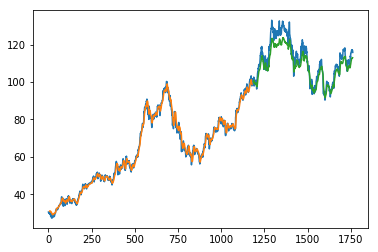

In [20]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(apple_stock_prices))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()